In [52]:
#import dependencies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Part 1: Prepare the Data

In [39]:
#Loading data:
file = Path ('Resources/myopia.csv')
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [40]:
#dropping MYOPIC column from the dataset
df1=df.drop(['MYOPIC'], axis=1)
df1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [41]:
#Standardise the dataset so that columns with larger values don't influence the outcome more than columns with smaller values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df1)

In [42]:
# Create a DataFrame with the transformed data
new_df1 = pd.DataFrame(scaler_data, columns=df1.columns)
new_df1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [43]:
# checking the number of the features:
new_df1.shape

(618, 14)

## Part 2: Apply Dimensionality Reduction

In [44]:
# using PCA to perform dimensionality reduction
from sklearn.decomposition import PCA

# initialise PCA model with preserve 90% of the explained variance in dimensionality reduction
pca = PCA (n_components=0.90)

new_df1_pca = pca.fit_transform(new_df1)

In [45]:
# Get the desired explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [46]:
# checking the number of the features change
new_df1_pca.shape

(618, 10)

The number of features has changed from 14 to 10 after performing dimensionality reduction with PCA

In [59]:
# Using t-SNE to further reduce the dataset dimensions
from sklearn.manifold import TSNE

# initialise t-SNE model
tsne = TSNE(n_components=3, perplexity=50,n_iter=250, random_state=42, learning_rate= 400)

In [60]:
# reduce dimensions:
tsne_features = tsne.fit_transform(new_df1_pca)

c:\Users\John Paul\anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [61]:
# checking the number of the features change:
tsne_features.shape

(618, 3)

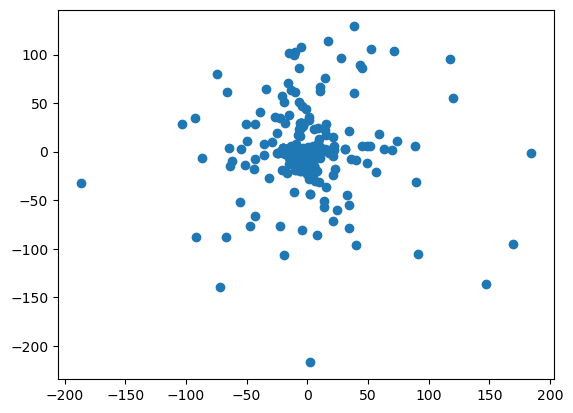

In [66]:
# Prepare to plot the dataset 

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

There is no distinct cluster for TSNE model

## Part 3: Perform a Cluster Analysis with K-means:

In [68]:
# create an elbow plot to identify the best number of clusters
# Using a for loop to determine the inertia for each k between 1 and 10
from sklearn.cluster import KMeans
inertia =[]
k = list (range(1,11))

for i in k:
    km = KMeans (n_clusters=i, random_state= 0)
    km.fit (new_df1_pca)
    inertia.append (km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\John Paul\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


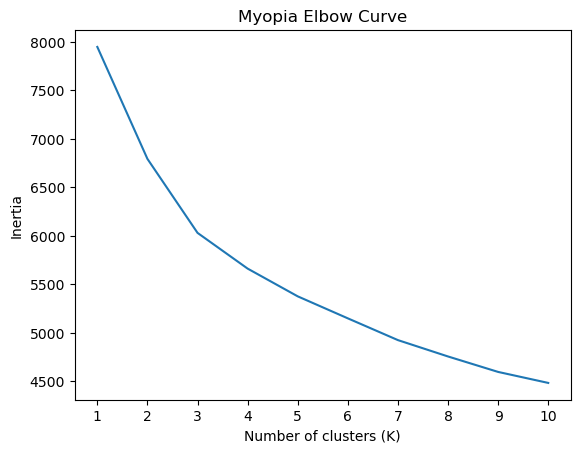

In [71]:
# plot the elbow:
plt.plot (df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Myopia Elbow Curve')
plt.show()

Based on the above plot, there is no K value for the Elbow Curve

## Part 4: Recommendation

Based on the above TSNE and K-Means models, the patients can't be clustered because there is no sign of elbow curve in K-Means value as well as no clear movement trend in TSNE. As a result, more training data and different models need to be used.